In [61]:
# Imports
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score, fbeta_score, make_scorer
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from pickle import dump, load 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from google.colab import drive
%matplotlib inline
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [36]:
drive.mount("./drive")

path_prefix = "./drive/My Drive"

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [37]:
fname = "reduced_hashed_churn_classification_case.snappy.parquet"
dataset = pd.read_parquet(join(path_prefix, fname))


Evaluating Datastructure

In [38]:
dataset.head()

,event_timestamp,first_event_timestamp,platform,country,date,coin,play_count,duration,failedboardnumber,status,superundousage,shuffleusage,undousage,life,event_type,revenue,session_count,currency,price,model,operating_system,churned,device_id_proc
0,1631446456494,1631370201191,ios,us,2021-09-12,60,52,0,0,2,0,0,0,5,level_event,None,None,None,None,"iPad7,5",iOS 14.7.1,1,04a55c15767b3daf3902e3bb1a0789d820a5f2f1925cdc...
10,1631446499809,1631446450684,ios,us,2021-09-12,130,3,0,0,2,0,0,0,5,level_event,None,None,None,None,"iPad7,5",iOS 14.6,1,08ac796b5184b6ed99699dc7b2e9aec3b35948bc95f41c...
23,1631446546436,1631359286235,ios,us,2021-09-12,540,30,0,0,2,0,0,0,4,level_event,None,None,None,None,"iPhone12,5",iOS 14.7.1,0,09ce6e470619d5387ccec940f35fd57ee2b1fb4a06908e...
26,1631446553446,1631246530481,ios,us,2021-09-12,322,119,153.46,0,1,0,0,0,1,level_event,None,None,None,None,"iPhone11,8",iOS 14.7.1,1,24f53dcc79b44d6797bba70a72b714a3d00d1f80b32115...
28,1631446568729,1631446555803,ios,us,2021-09-12,100,1,4.936,0,1,0,0,0,5,level_event,None,None,None,None,"iPhone12,1",iOS 14.7.1,1,0df062d0e886a51c47acfce4f070af62ff534ca9a83c9e...


In [39]:
dataset.columns

Index(['event_timestamp', 'first_event_timestamp', 'platform', 'country',
       'date', 'coin', 'play_count', 'duration', 'failedboardnumber', 'status',
       'superundousage', 'shuffleusage', 'undousage', 'life', 'event_type',
       'revenue', 'session_count', 'currency', 'price', 'model',
       'operating_system', 'churned', 'device_id_proc'],
      dtype='object')

In [40]:
dataset.describe()

,event_timestamp,first_event_timestamp,churned
count,2.643676e+06,2.643676e+06,2.643676e+06
mean,1.631582e+12,1.631445e+12,8.533761e-01
std,1.834834e+08,1.240955e+08,3.537306e-01
min,1.630549e+12,1.631232e+12,0.000000e+00
25%,1.631454e+12,1.631331e+12,1.000000e+00
50%,1.631577e+12,1.631456e+12,1.000000e+00
75%,1.631706e+12,1.631557e+12,1.000000e+00
max,1.633045e+12,1.631664e+12,1.000000e+00


In [41]:
dataset.dtypes

event_timestamp           int64
first_event_timestamp     int64
platform                 object
country                  object
date                     object
coin                     object
play_count               object
duration                 object
failedboardnumber        object
status                   object
superundousage           object
shuffleusage             object
undousage                object
life                     object
event_type               object
revenue                  object
session_count            object
currency                 object
price                    object
model                    object
operating_system         object
churned                   int64
device_id_proc           object
dtype: object

In [42]:
dataset.columns.to_series().groupby(dataset.dtypes).groups

{int64: ['event_timestamp', 'first_event_timestamp', 'churned'], object: ['platform', 'country', 'date', 'coin', 'play_count', 'duration', 'failedboardnumber', 'status', 'superundousage', 'shuffleusage', 'undousage', 'life', 'event_type', 'revenue', 'session_count', 'currency', 'price', 'model', 'operating_system', 'device_id_proc']}

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643676 entries, 0 to 16534
Data columns (total 23 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   event_timestamp        int64 
 1   first_event_timestamp  int64 
 2   platform               object
 3   country                object
 4   date                   object
 5   coin                   object
 6   play_count             object
 7   duration               object
 8   failedboardnumber      object
 9   status                 object
 10  superundousage         object
 11  shuffleusage           object
 12  undousage              object
 13  life                   object
 14  event_type             object
 15  revenue                object
 16  session_count          object
 17  currency               object
 18  price                  object
 19  model                  object
 20  operating_system       object
 21  churned                int64 
 22  device_id_proc         object
dtypes: int64(

In [44]:
dataset.isna().any()

event_timestamp          False
first_event_timestamp    False
platform                 False
country                  False
date                     False
coin                      True
play_count                True
duration                  True
failedboardnumber         True
status                    True
superundousage            True
shuffleusage              True
undousage                 True
life                      True
event_type               False
revenue                   True
session_count             True
currency                  True
price                     True
model                     True
operating_system          True
churned                  False
device_id_proc           False
dtype: bool

Unique values in each categorical variable

In [45]:
dataset["platform"].nunique()

dataset["platform"].unique()

array(['ios'], dtype=object)

In [46]:
dataset["country"].nunique()

dataset["country"].unique()

array(['us', 'bh', 'gb', 'ir', 'pr', 'de', 'bz', 'se', 'fr', 'tr', '',
       'sy', 'hk', 'ru', 'ca', 'bs', 'mx', 'xk', 'br', 'cn', 'pk', 'vi',
       'ge', 'sg', 'ie', 'il', 'ht', 'ng', 'eg', 'as', 'ps', 'iq', 'bg',
       'bn', 'jp', 'do', 'ua', 'it', 'al', 'pe', 'cy', 'mm', 'za', 'sa',
       'qa', 'nl'], dtype=object)

In [47]:
dataset["status"].nunique()

dataset["status"].unique()

array(['2', '1', '0', '3', '4', None], dtype=object)

In [48]:
dataset["event_type"].nunique()

dataset["event_type"].unique()

array(['level_event', 'rewarded_impression', 'interstitial_impression',
       'iap'], dtype=object)

In [49]:
dataset["currency"].nunique()

dataset["currency"].unique()

array([None, 'USD', 'TRY'], dtype=object)

In [50]:
dataset["model"].nunique()

dataset["model"].unique()

array(['iPad7,5', 'iPhone12,5', 'iPhone11,8', 'iPhone12,1', 'iPhone12,3',
       'iPhone13,2', 'iPhone11,6', 'iPhone13,4', 'iPhone13,3', 'iPad11,3',
       'iPad8,1', 'iPhone10,5', 'iPhone9,3', 'iPhone10,2', 'iPad7,11',
       'iPhone10,1', 'iPhone10,4', 'iPad11,7', 'iPhone11,2', 'iPhone10,3',
       'iPad4,4', 'iPhone10,6', 'iPhone12,8', 'iPad5,3', 'iPad11,6',
       'iPhone9,1', 'iPad8,9', 'iPhone9,2', 'iPad13,2', 'iPhone8,2',
       'iPad5,4', 'iPad8,7', 'iPhone13,1', 'iPad5,1', 'iPad13,8',
       'iPad6,11', 'iPad11,1', 'iPad13,1', 'iPad8,5', 'iPad13,4',
       'iPad11,2', 'iPad4,5', 'iPad11,4', 'iPad7,3', 'iPad6,7',
       'iPad8,11', 'iPad13,10', 'iPad7,6', 'iPad6,12', 'iPhone8,1',
       'iPhone9,4', 'iPad7,12', 'iPad6,3', 'iPad7,4', 'iPad7,2',
       'iPad7,1', 'iPad4,2', 'iPad4,1', 'iPad6,4', 'iPad5,2', 'iPad8,10',
       'iPad8,3', 'iPad8,12', 'iPhone7,2', 'iPad13,6', 'iPhone8,4',
       'iPad8,4', 'iPhone7,1', 'iPad6,8', 'iPad8,8', 'iPad8,2', 'iPod7,1',
       'iPad4,8', 'iP

In [51]:
dataset["operating_system"].nunique()

dataset["operating_system"].unique()

array(['iOS 14.7.1', 'iOS 14.6', 'iOS 14.4.2', 'iOS 13.6.1', 'iOS 14.2',
       'iOS 12.4.8', 'iOS 14.5', 'iOS 14.8', 'iOS 14.2.1', 'iOS 11.4',
       'iOS 12.4.9', 'iOS 14.4.1', 'iOS 13.5.1', 'iOS 14.4', 'iOS 14.0',
       'iOS 14.7', 'iOS 13.4.1', 'iOS 14.5.1', 'iOS 12.5.4', 'iOS 14.3',
       'iOS 13.7', 'iOS 15.0', 'iOS 13.3', 'iOS 14.0.1', 'iOS 12.5.3',
       'iOS 14.1', 'iOS 13.1.3', 'iOS 12.4', 'iOS 13.3.1', 'iOS 12.4.7',
       'iOS 13.2', 'iOS 12.1.4', 'iOS 13.1.2', 'iOS 13.4', 'iOS 13.2.3',
       'iOS 12.3.1', 'iOS 13.6', 'iOS 12.5.2', 'iOS 12.2', 'iOS 13.0',
       'iOS 12.5.1', 'iOS 12.4.1', 'iOS 12.1', 'iOS 13.1.1', 'iOS 12.0.1',
       'iOS 11.3.1', 'iOS 12.1.1', 'iOS 13.5', 'iOS 11.4.1', 'iOS 12.4.6',
       'iOS 13.1', None], dtype=object)

In [52]:
dataset["failedboardnumber"].nunique()

dataset["failedboardnumber"].unique()

array(['0', '1', None], dtype=object)

Checking Target Variable Distribution

In [53]:
dataset["churned"].value_counts()


1    2256050
0     387626
Name: churned, dtype: int64

Cleaning the Data

In [54]:
tu_num=['coin','play_count','duration','superundousage','shuffleusage','undousage','life','revenue','session_count','price']
for i in range (len(tu_num)):
    dataset[tu_num[i]] = pd.to_numeric(dataset[tu_num[i]],errors='coerce')
    dataset[tu_num[i]] = dataset[tu_num[i]].astype("float")
dataset["date"]=pd.to_datetime(dataset["date"])
dataset["date"]=dataset["date"].dt.day_name()
dataset['churned'] = dataset['churned'].apply(str)

Taking care of missing data

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643676 entries, 0 to 16534
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   event_timestamp        int64  
 1   first_event_timestamp  int64  
 2   platform               object 
 3   country                object 
 4   date                   object 
 5   coin                   float64
 6   play_count             float64
 7   duration               float64
 8   failedboardnumber      object 
 9   status                 object 
 10  superundousage         float64
 11  shuffleusage           float64
 12  undousage              float64
 13  life                   float64
 14  event_type             object 
 15  revenue                float64
 16  session_count          float64
 17  currency               object 
 18  price                  float64
 19  model                  object 
 20  operating_system       object 
 21  churned                object 
 22  device_id_proc      

In [56]:
dataset.isna().any()

event_timestamp          False
first_event_timestamp    False
platform                 False
country                  False
date                     False
coin                      True
play_count                True
duration                  True
failedboardnumber         True
status                    True
superundousage            True
shuffleusage              True
undousage                 True
life                      True
event_type               False
revenue                   True
session_count             True
currency                  True
price                     True
model                     True
operating_system          True
churned                  False
device_id_proc           False
dtype: bool

In [57]:
na_cols = dataset.isna().any()

na_cols = na_cols[na_cols == True].reset_index()

na_cols = na_cols["index"].tolist()

for col in dataset.columns[1:]:
     if col in na_cols:
        if dataset[col].dtype != 'object':
             dataset[col] =  dataset[col].fillna(dataset[col].mean()).round(0)

In [58]:
dataset.isna().any()  

event_timestamp          False
first_event_timestamp    False
platform                 False
country                  False
date                     False
coin                     False
play_count               False
duration                 False
failedboardnumber         True
status                    True
superundousage           False
shuffleusage             False
undousage                False
life                     False
event_type               False
revenue                  False
session_count            False
currency                  True
price                    False
model                     True
operating_system          True
churned                  False
device_id_proc           False
dtype: bool

## **Data Evaluation**

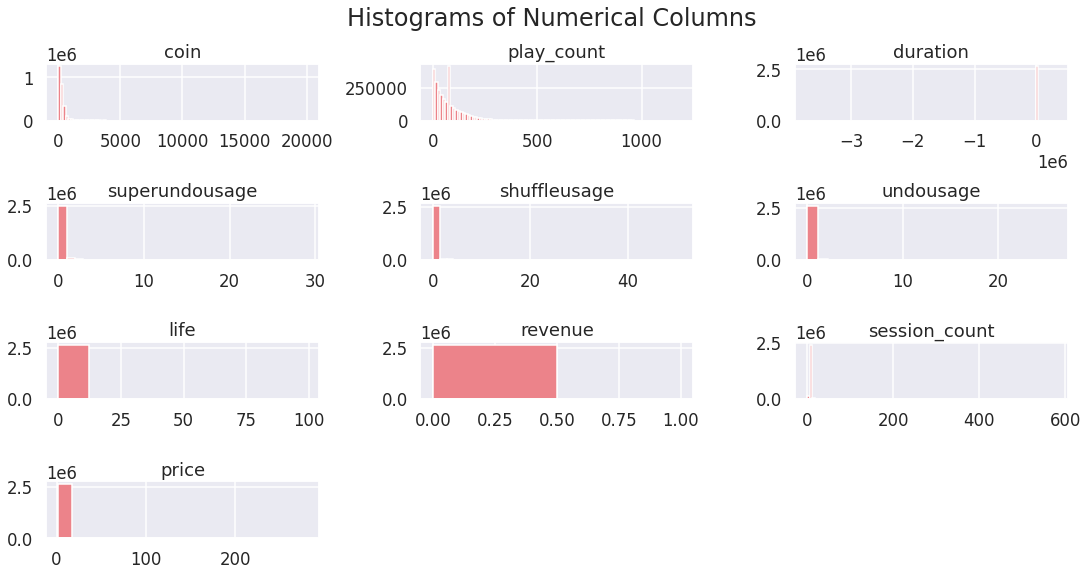

In [59]:
dataset2 = dataset[tu_num]

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


**Analyze distribution of Categorical Variables**

-There is only one platform so this column is useless and US as a country and as a currency leads the data so they also seems like useless

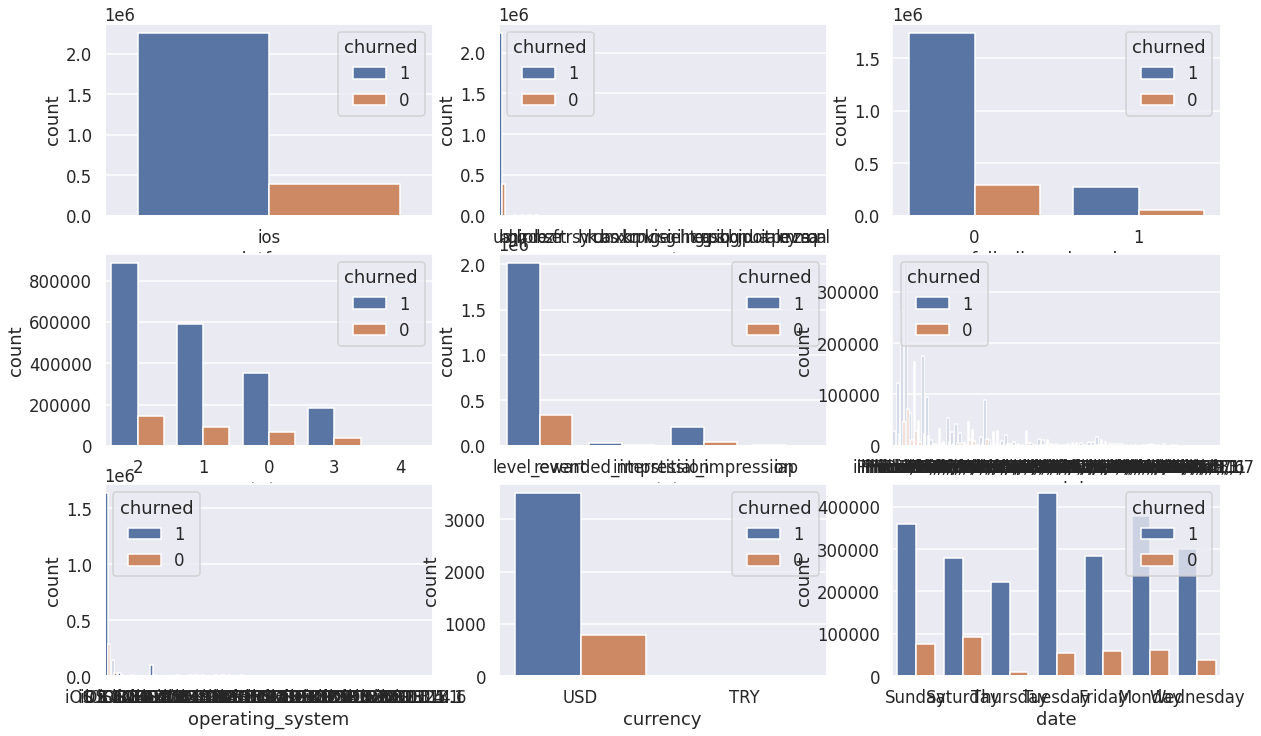

In [60]:
fig, axarr = plt.subplots(3, 3, figsize=(20, 12))
sns.countplot(x='platform', hue = 'churned',data = dataset, ax=axarr[0][0])
sns.countplot(x='country', hue = 'churned',data = dataset, ax=axarr[0][1])
sns.countplot(x='failedboardnumber', hue = 'churned',data = dataset, ax=axarr[0][2])
sns.countplot(x='status', hue = 'churned',data = dataset, ax=axarr[1][0])
sns.countplot(x='event_type', hue = 'churned',data = dataset, ax=axarr[1][1])
sns.countplot(x='model', hue = 'churned',data = dataset, ax=axarr[1][2])
sns.countplot(x='operating_system', hue = 'churned',data = dataset, ax=axarr[2][0])
sns.countplot(x='currency', hue = 'churned',data = dataset, ax=axarr[2][1])
sns.countplot(x='date', hue = 'churned',data = dataset, ax=axarr[2][2])

Overall Churn Rate 

note: imbalanced data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


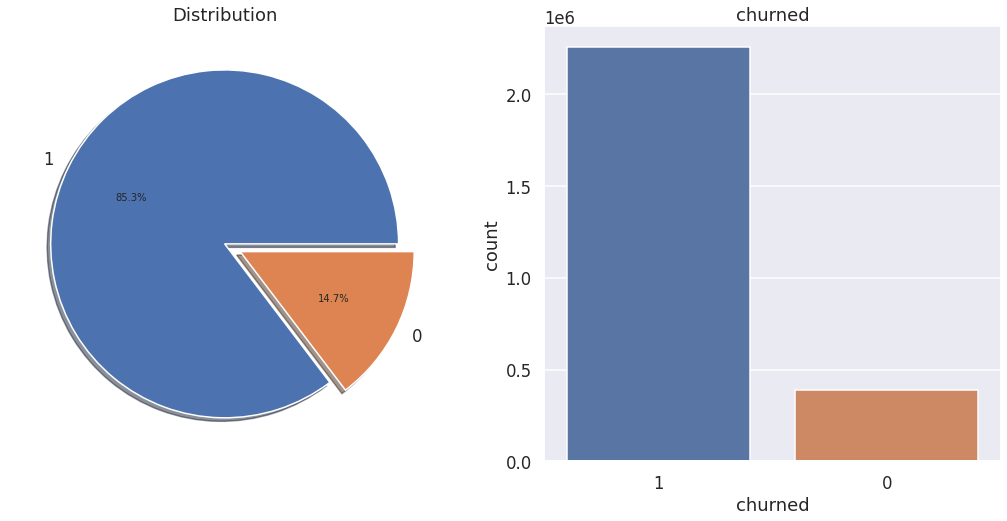

In [62]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['churned'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution')
ax[0].set_ylabel('')
sns.countplot('churned',data=dataset,ax=ax[1])
ax[1].set_title('churned')
plt.show()

Find positive and negative correlations

In [64]:

dataset['churned'] = pd.to_numeric(dataset['churned'],errors='coerce')
dataset2 = dataset[['coin', 'play_count', 'duration',
       'superundousage', 'shuffleusage', 'undousage',
        'life', 'revenue', 'session_count','price','status','date','failedboardnumber','event_type','date']]

correlations = dataset2.corrwith(dataset.churned)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 life              0.063386
superundousage    0.008121
undousage         0.005808
revenue           0.001959
dtype: float64

Most Negative Correlations: 
 duration        -0.000113
price           -0.001853
session_count   -0.008223
coin            -0.008944
shuffleusage    -0.013039
play_count      -0.118764
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

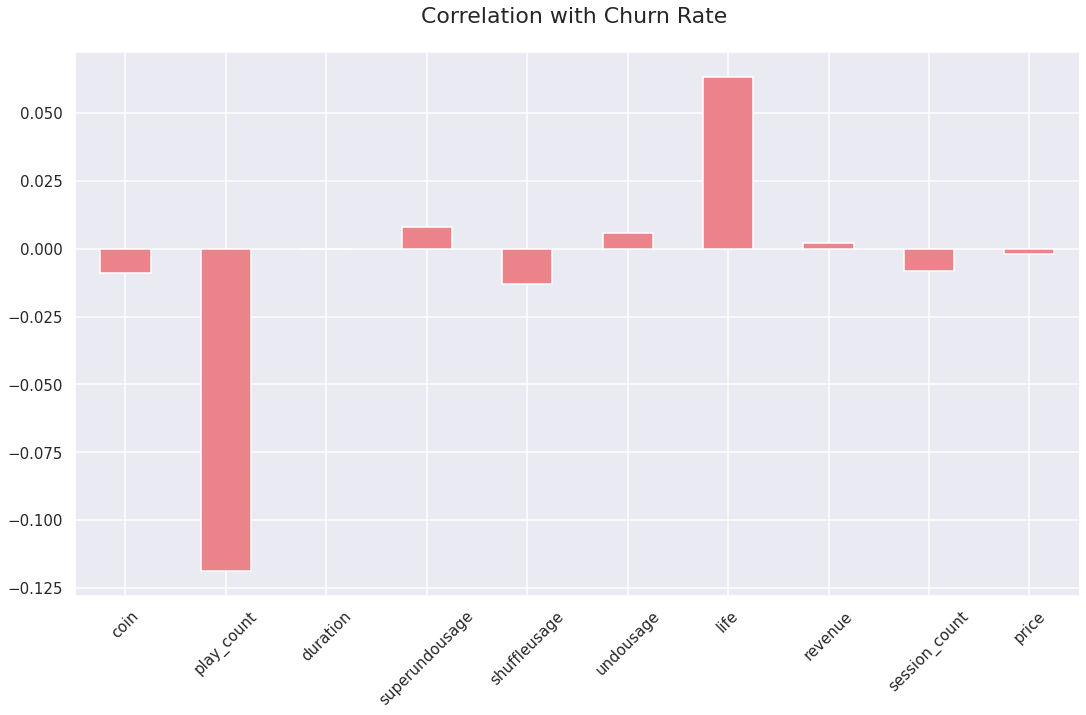

In [65]:
correlations = dataset2.corrwith(dataset.churned)
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (18, 10), fontsize = 15, color = '#ec838a',
        rot = 45, grid = True)

plt.title('Correlation with Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

Plot Correlation Matrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


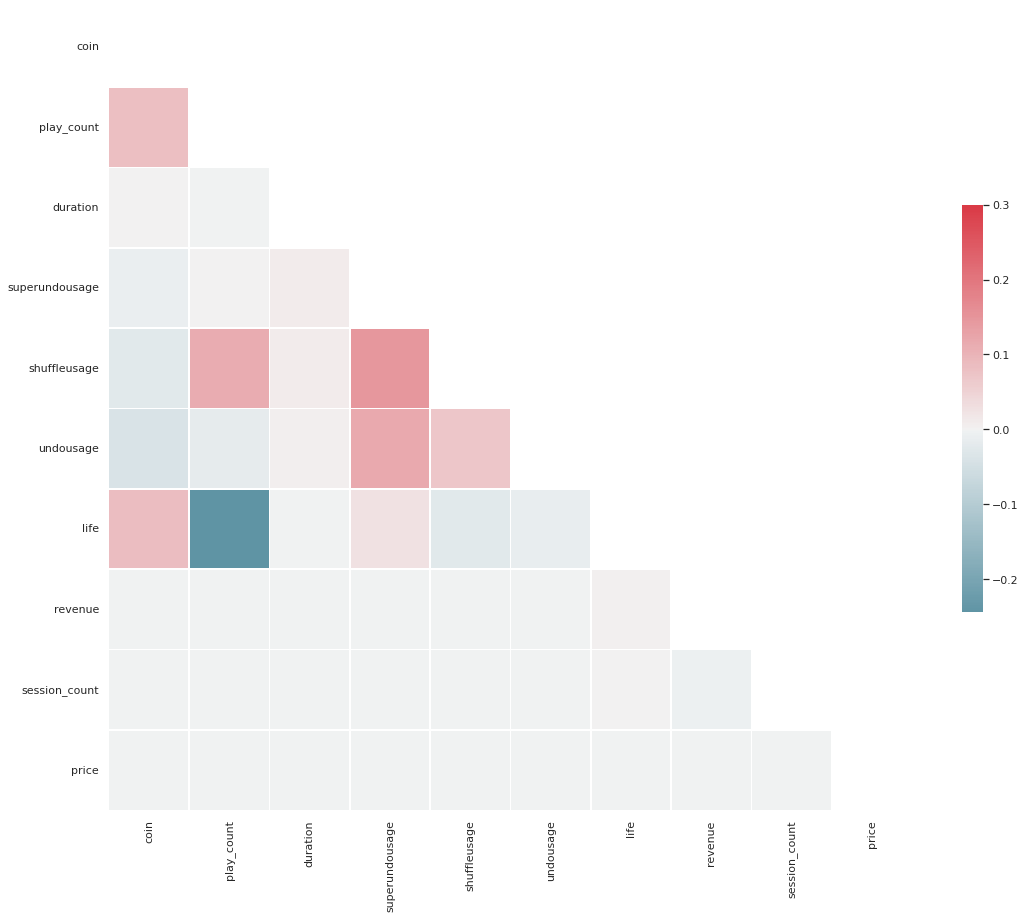

In [66]:
dataset['churned'] = dataset['churned'].apply(str)
sn.set(style="white")
corr = dataset2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)

sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Label Encoding and Droping Useless Data

In [67]:
dataset = dataset.drop(columns = "event_timestamp")  
dataset = dataset.drop(columns = "first_event_timestamp")  
dataset = dataset.drop(columns = "country")  
dataset = dataset.drop(columns = "currency")  
dataset = dataset.drop(columns = "operating_system") 
dataset = dataset.drop(columns = "model") 
dataset = dataset.drop(columns = "platform") 

le = LabelEncoder()

le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))



1 columns were label encoded.


Encode Categorical data

In [68]:

identity = dataset["device_id_proc"]

dataset = dataset.drop(columns="device_id_proc")

dataset= pd.get_dummies(dataset)

dataset = pd.concat([dataset, identity], axis = 1)

Spliting the dataset into dependent and independent variables

In [69]:

response = dataset["churned"]

dataset = dataset.drop(columns="churned")

#  Generating training and test datasets of dependent and independent 

I used test size as 0.9 because data was huge and it was taking too much time to train

I also used stratify parameter in order to solve class imbalance

In [70]:

X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    stratify=response, 
                                                    test_size = 0.9, 
                                                    random_state = 0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (264367, 29)
Number transactions y_train dataset:  (264367,)
Number transactions X_test dataset:  (2379309, 29)
Number transactions y_test dataset:  (2379309,)


Removing Identifiers


In [71]:

train_identity = X_train['device_id_proc']
X_train = X_train.drop(columns = ['device_id_proc'])

test_identity = X_test['device_id_proc']
X_test = X_test.drop(columns = ['device_id_proc'])

Feature Scaling

In [72]:

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

### **Model Selection**

In [73]:

models = [
    
    ('Logistic Regression', LogisticRegression(class_weight='balanced')),
    ('Decision Tree', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)), 
    ('Neural Network', MLPClassifier(early_stopping=True))]
for _, model in models:
    model.fit(X_train, y_train)
    

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid featu

In [74]:
def visualize_cm_matrices(n_cols, n_rows, models, x_test, y_test):
    if n_cols * n_rows < len(models):
        print('You need more axes to cover your model list!')
        return
    n_models = len(models)
    sns.set_style('dark')
    sns.set_context('talk')
    fig, axes = plt.subplots(n_rows, n_cols, 
                             
                             figsize=(6.7 * n_cols, 5 * n_rows))
    axes_flat = axes.flatten()

    for i in range(n_models):
        cm_display = plot_confusion_matrix(models[i][1], x_test, y_test, 
                                           ax=axes_flat[i], normalize='all',
                                           display_labels=le.classes_)
        cm_display.im_.set_clim(vmin=0, vmax=0.5)
        axes_flat[i].set_title(models[i][0], loc='left')

    for ax in axes_flat[n_models:]:
        ax.set_visible(False)

    plt.tight_layout()
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

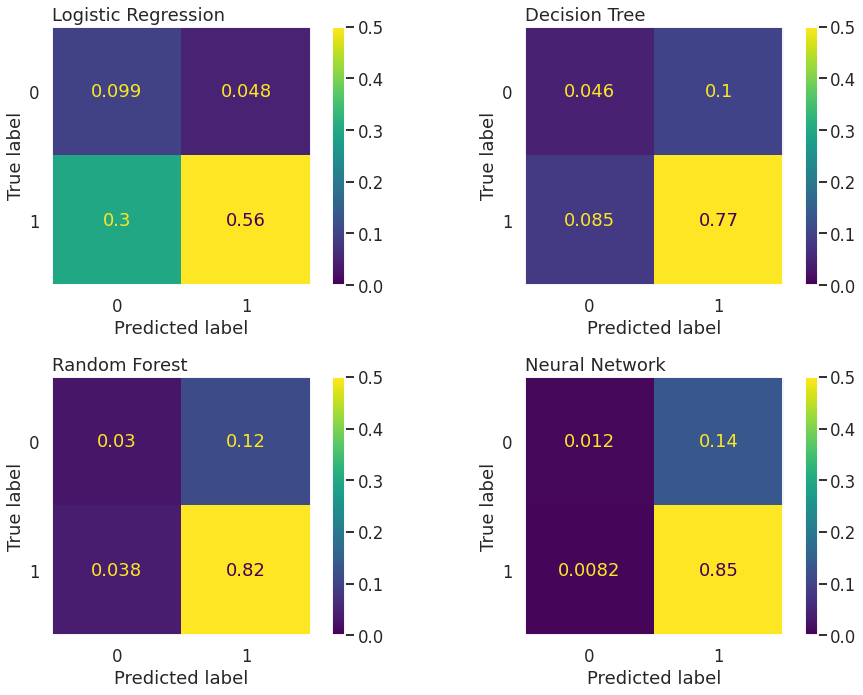

In [76]:

visualize_cm_matrices(2, 2, models, X_test, y_test)  

### **Score The Results**

In [77]:


def score_models(models, x_test, y_test):
    """
    Transfers the precision, recall, f1, accuracy and false positive 
    rate to a dataframe for all the models specified by the models 
    parameter. The latter should be a list of tuples where the first entry
    is the string name of the model and the 2nd is a corresponding 
    trained model.
    
    :param models: List of (model_name, trained model) tuples.
    :param x_test: The list of test set features.
    :param y_test: The list of test set labels.
    """
    scores = []
    model_names = []
    for model_name, model in models:
        y_predicted = model.predict(x_test)
        # precision, recall, f1 from metrics
        p, r, f, _ = precision_recall_fscore_support(
            y_test, y_predicted, pos_label=1, average='binary')
        # accuracy from model score fct; alternatively from cm
        a = model.score(x_test, y_test)
        # false positive rate from confusion matrix
        cm = confusion_matrix(y_test, y_predicted)
        fpr = cm[0][1] / (cm[0][1] + cm[1][1])
        # add the row
        scores.append((p,r, f, a, fpr))
        # add to the row index
        model_names.append(model_name)
    results = pd.DataFrame(
        scores, columns=['precision', 'recall', 'f1', 'accuracy', 'fpr'], 
        index=model_names)
    return results

In [78]:
score_models(models, X_test, y_test).sort_values('f1', ascending=False)

,precision,recall,f1,accuracy,fpr
Neural Network,0.862252,0.990391,0.921890,0.856780,0.137748
Random Forest,0.874631,0.955992,0.913504,0.845506,0.125369
Decision Tree,0.883776,0.900172,0.891899,0.813787,0.116224
Logistic Regression,0.921079,0.650843,0.762732,0.654448,0.078921


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

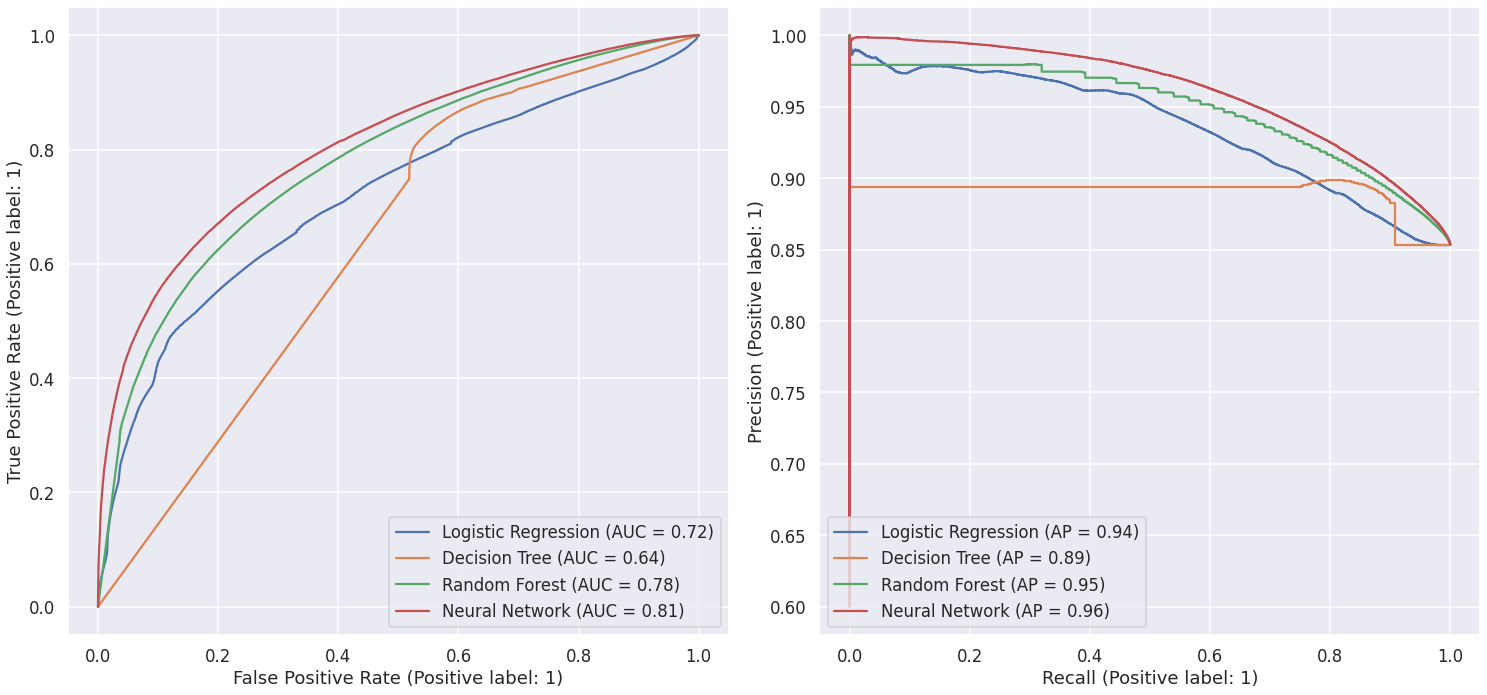

In [79]:
from sklearn.metrics import plot_roc_curve

def visualize_roc_pr(models, x_test, y_test, pr_lim=(0.5, 1)):
    sns.set_style('darkgrid')
    _, ax = plt.subplots(1, 2, figsize=(21, 10))
    for model_name, model in models:
        plot_roc_curve(model, x_test, y_test, name=model_name, ax=ax[0])

    for model_name, model in models:
        plot_precision_recall_curve(model, x_test, y_test, name=model_name, ax=ax[1])

    plt.tight_layout()
    
    plt.show()

visualize_roc_pr(models, X_test, y_test, (0, 1))

**Outcomes**

- The F1 score is a good choice for the model ranking since it offers a good balance between precision and recall. From above you can also see that F1 positively correlates with accuracy.

- The curves consolidate the ranking suggested by the f1 scores, with logistic regression, random forests and neural networks dominating in terms of area under the curve and AP scores.

- The preliminary analysis suggests that the default neural network model performs best for the task at hand.

- Feature extraction module that is provided were not working in my favor, even I fill the needed part, I prefered to not use them. ( I am leaving the required code below.)

Some questions about the case study:
1) There is no column named shuggleusage. The column is named shuffleusage.
2) In the case, status is defined for 0,1 and 2, but 3 and 4 are also present in the data. Seems like 3 and 4 are related to event types.
3)It says there is 4 days of data, but 10 days of data



In [ ]:
def extract_impression_revenue(df:pd.DataFrame)->pd.DataFrame:
    """Extract impression revenue
    """
    df['revenue'] = df['revenue'].astype(float)
    return df.groupby(['device_id']).agg(sum_revenue=('revenue','sum'),
                              no_rewarded_impression=('revenue',lambda x: x.shape[0]))



def extract_coin_features(df:pd.DataFrame)->pd.DataFrame:
    """Extract coin features per user

       Groups the input by device id, and aggregates 'coin' field 
       
       Calculates number of expanse with coin, 
                  standard deviation of coin
                  mean of coin
                  coefficient of variation of coin
        
        Args:
            df (pd.Dataframe): Dataframe of users with level event
        Returns:
            pd.Dataframe : Grouped and aggregated
    """
    return df.groupby(['device_id']).agg(
                                 std_coin=('coin',lambda x: x.astype('float').std()),
                                 mean_coin=('coin',lambda x: x.astype('float').mean()),
                                 last_coin=('coin',lambda x: x.astype('float').values[-1]),
                                 cr=('churned', 'sum')
                                    )

def extract_model_operating_system(df: pd.DataFrame)->pd.DataFrame:
    """Extract the model and the operating system
    
    """
    
    return df.groupby(['device_id']).agg(model=('model',lambda x: x.unique()[0]),
                                 operating_system=('operating_system',lambda x: x.unique()[0]))
def extract_duration_features(df:pd.DataFrame)-> pd.DataFrame:
    """Extract duration features per user
        
        Groups the input by device id, and aggragetes 'duration' field. From the
        duration field, it calculates the statistics and total duration spent in 
        the game. Note, the data might include duration fields that are zero.

            
        TODO:
            - mean
            - std
            - coefficient of variation
            - sum duration
        
        Args:
            df (pd.DataFrame): DataFrame of users with level events
        Returns:
            pd.Dataframe : Grouped and aggregated
    """
    duration_df =  pd.DataFrame()
    ##############################################################
    # YOUR CODE GOES HERE
    df['duration'] = df['duration'].astype(float)
    
    return df.groupby(['device_id']).agg(
                                 std=('duration',lambda x: x.astype('float').std()),
                                 mean=('duration',lambda x: x.astype('float').mean()),
                                 cv=('duration',lambda x: x.astype('float').values[-1]),
                                 total_time_spent=('duration','sum'),
                                 cr=('churned', 'sum')
                                    )
    mean = None
    std = None
    cv = None
    total_time_spent = None
    
    
    ##############################################################
    
    if cv == None or (total_time_spent == None and std == None and mean == None):
        raise NotImplementedError
    
    duration_df['mean'] = mean
    duration_df['std'] = std
    duration_df['cv'] = cv
    duration_df['total_time_spent'] = total_time_spent
    
    return duration_df

def categorical_transformer(feature_df,categorical_features,df):
    """ Transform string values in the categorical features to 
        mathematically usable forms.
        
        Args:
            feature_df (pd.DataFrame): Feature Dataframe
            categorical_features (List): list of column names that are categorical
        Returns:
            transformed_df (pd.DataFrame)
    """
    df=df
    le = LabelEncoder()
    for gokturk in categorical_features:
        label = le.fit_transform(df[gokturk])
        feature_df.drop(gokturk, axis=1, inplace=True)
        feature_df[gokturk] = label
    return feature_df
    raise NotImplementedError